In [3]:
%matplotlib inline

In [1]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

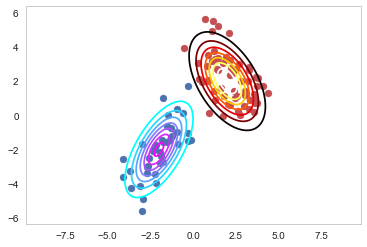

In [4]:
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

In [5]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [6]:
model_norm.classes_

array([0., 1.])

In [7]:
model_norm.class_count_

array([40., 60.])

In [8]:
model_norm.class_prior_

array([0.4, 0.6])

In [9]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [10]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

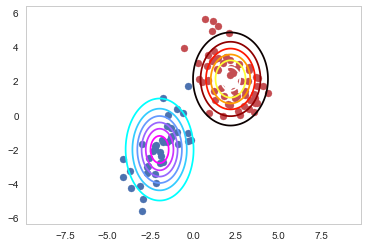

In [11]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

In [12]:
x_new = [-0.7, -0.8]
model_norm.predict_proba([x_new])

array([[0.98300323, 0.01699677]])

In [13]:
likelihood = [
    sp.stats.norm(model_norm.theta_[0], np.sqrt(model_norm.sigma_[0])).pdf(x_new).prod(),
    sp.stats.norm(model_norm.theta_[1], np.sqrt(model_norm.sigma_[1])).pdf(x_new).prod()]
likelihood

[0.0346968402917242, 0.0003999540815189114]

In [14]:
posterior = likelihood * model_norm.class_prior_
posterior

array([0.01387874, 0.00023997])

In [15]:
posterior / posterior.sum()

array([0.98300323, 0.01699677])

#### P. 붓꽃 분류 문제를 가우시안 나이브 베이즈 모형을 사용하여 풀고 다음을 구하라.

1. confusion matrix
2. classification report

In [18]:
from sklearn.datasets import load_iris

In [19]:
from sklearn.metrics import *

In [20]:
iris = load_iris()
X = iris.data
y = iris.target

In [21]:
model_iris = GaussianNB().fit(X, y)

In [30]:
confusion_matrix(y, model_iris.predict(iris.data))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [31]:
print(classification_report(y, model_iris.predict(iris.data)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150



Q2. MNIST Digit 분류 문제에서 sklearn.preprocessing.Binarizer로 x값을 0, 1로 바꾼다(값이 8 이상이면 1, 8 미만이면 0). 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다. 이 이미지에 대해 베르누이 나이브 베이즈 모형을 적용한다.

In [32]:
from sklearn.datasets import load_digits

digits = load_digits()

In [38]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [59]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=8).fit(digits.data) 
binarizer.transform(digits.data)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [61]:
transfomed = binarizer.transform(digits.data)

In [62]:
X1 = digits.data
y1 = digits.target

In [70]:
from sklearn.naive_bayes import BernoulliNB

In [71]:
model_digits = BernoulliNB().fit(X1, y1)

In [72]:
confusion_matrix(y1, model_digits.predict(X1))

array([[175,   1,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0, 112,  21,   0,   3,   1,   1,   1,  32,  11],
       [  0,   6, 153,   6,   0,   0,   0,   1,  11,   0],
       [  1,   1,   3, 157,   0,   2,   0,   3,   7,   9],
       [  0,   1,   0,   0, 172,   0,   0,   7,   1,   0],
       [  2,   3,   0,   2,   1, 149,   2,   0,   3,  20],
       [  0,   5,   0,   0,   2,   2, 171,   0,   1,   0],
       [  0,   0,   0,   0,   3,   0,   0, 175,   1,   0],
       [  0,  13,   1,   4,   0,   3,   2,   2, 142,   7],
       [  0,   6,   0,   3,   7,   3,   0,   9,   6, 146]], dtype=int64)

In [73]:
print(classification_report(y1, model_digits.predict(X1)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       178
          1       0.76      0.62      0.68       182
          2       0.86      0.86      0.86       177
          3       0.91      0.86      0.88       183
          4       0.91      0.95      0.93       181
          5       0.93      0.82      0.87       182
          6       0.97      0.94      0.96       181
          7       0.88      0.98      0.93       179
          8       0.70      0.82      0.75       174
          9       0.76      0.81      0.78       180

avg / total       0.87      0.86      0.86      1797



In [76]:
theta = np.exp(model_digits.feature_log_prob_)
theta

array([[0.00555556, 0.01666667, 0.88888889, 0.99444444, 0.98888889,
        0.76111111, 0.03888889, 0.00555556, 0.00555556, 0.35      ,
        0.98888889, 0.99444444, 0.98888889, 0.99444444, 0.32777778,
        0.00555556, 0.00555556, 0.85      , 0.99444444, 0.80555556,
        0.52777778, 0.98888889, 0.8       , 0.00555556, 0.00555556,
        0.95555556, 0.99444444, 0.38888889, 0.07777778, 0.98888889,
        0.97777778, 0.00555556, 0.00555556, 0.97777778, 0.99444444,
        0.21666667, 0.02777778, 0.99444444, 0.96666667, 0.00555556,
        0.00555556, 0.89444444, 0.99444444, 0.42222222, 0.4       ,
        0.99444444, 0.9       , 0.00555556, 0.00555556, 0.36666667,
        0.99444444, 0.99444444, 0.97222222, 0.99444444, 0.61111111,
        0.00555556, 0.00555556, 0.01111111, 0.91666667, 0.99444444,
        0.99444444, 0.9       , 0.13333333, 0.00555556],
       [0.00543478, 0.01630435, 0.51086957, 0.83152174, 0.93478261,
        0.69021739, 0.27717391, 0.00543478, 0.00543478, 0.0

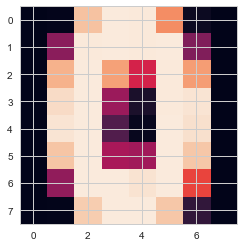

In [78]:
plt.imshow(theta[0].reshape(8,8))

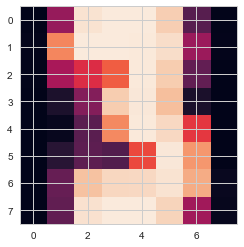

In [80]:
plt.imshow(theta[3].reshape(8,8))

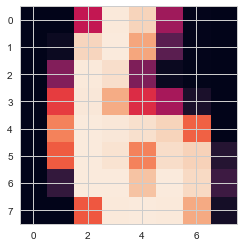

In [82]:
plt.imshow(theta[6].reshape(8,8))

In [87]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(digits.data, digits.target)

In [88]:
confusion_matrix(digits.target, model_mult.predict(digits.data))

array([[175,   0,   0,   0,   3,   0,   0,   0,   0,   0],
       [  0, 137,  14,   0,   0,   1,   2,   0,  13,  15],
       [  0,   7, 160,   0,   0,   0,   0,   0,   8,   2],
       [  0,   0,   2, 159,   0,   2,   0,   5,   8,   7],
       [  1,   0,   0,   0, 173,   0,   0,   4,   3,   0],
       [  0,   0,   0,   0,   1, 157,   1,   1,   2,  20],
       [  0,   2,   0,   0,   1,   1, 176,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   1,   0],
       [  0,  11,   1,   0,   1,   0,   1,   1, 154,   5],
       [  0,   1,   0,   1,   1,   1,   0,  11,   7, 158]], dtype=int64)

In [89]:
print(classification_report(digits.target, model_mult.predict(digits.data)))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       178
          1       0.87      0.75      0.81       182
          2       0.90      0.90      0.90       177
          3       0.99      0.87      0.93       183
          4       0.96      0.96      0.96       181
          5       0.97      0.86      0.91       182
          6       0.98      0.97      0.98       181
          7       0.89      0.99      0.94       179
          8       0.78      0.89      0.83       174
          9       0.76      0.88      0.82       180

avg / total       0.91      0.91      0.91      1797



In [90]:
theta1 = np.exp(model_mult.feature_log_prob_)
theta1

array([[1.77056959e-05, 8.85284796e-05, 1.32084492e-02, 4.12896829e-02,
        3.56238602e-02, 9.24237327e-03, 1.23939871e-04, 1.77056959e-05,
        1.77056959e-05, 2.81520565e-03, 3.96607589e-02, 4.21572620e-02,
        3.62435596e-02, 3.58717399e-02, 3.06308539e-03, 1.77056959e-05,
        1.77056959e-05, 1.17742878e-02, 4.50078790e-02, 1.66079428e-02,
        6.63963597e-03, 3.83682431e-02, 1.11191770e-02, 1.77056959e-05,
        1.77056959e-05, 1.66964713e-02, 4.00856956e-02, 6.30322775e-03,
        4.60348094e-04, 2.85769932e-02, 2.03438446e-02, 1.77056959e-05,
        1.77056959e-05, 1.85201579e-02, 3.64383222e-02, 2.83291135e-03,
        1.59351263e-04, 2.76740027e-02, 2.24685281e-02, 1.77056959e-05,
        1.77056959e-05, 1.10306486e-02, 4.18916766e-02, 5.22318030e-03,
        4.85136068e-03, 3.56592716e-02, 1.84670408e-02, 1.77056959e-05,
        1.77056959e-05, 2.53191452e-03, 4.11657430e-02, 3.14099046e-02,
        3.26315976e-02, 4.17854424e-02, 7.63115494e-03, 1.770569